# Create fake data from a given simulation and covariance

Plot mock data from central Gadget sim, and from fiducial Nyx sim

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 160
mpl.rcParams['figure.dpi'] = 160
from lace.archive import gadget_archive
from lace.archive import nyx_archive
from cup1d.data import data_Chabanier2019
from cup1d.data import data_Karacayli2022
from cup1d.data import data_gadget
from cup1d.data import data_nyx

In [2]:
# setup data to mimic, with a maximum z to avoid redshifts not emulated
data_label="Chabanier2019"
zmin=2.0
zmax=4.5
if data_label=="Chabanier2019":
    data=data_Chabanier2019.P1D_Chabanier2019(zmin=zmin,zmax=zmax)
elif data_label=="Karacayli2022":
    data=data_Karacayli2022.P1D_Karacayli2022(zmin=zmin,zmax=zmax)

In [3]:
mpg_archive=gadget_archive.GadgetArchive(postproc='Cabayol23')

In [4]:
nyx_archive=nyx_archive.NyxArchive(verbose=True)

read Nyx sim bar_ic_grid_3
read Nyx sim cosmo_grid_0
read Nyx sim cosmo_grid_1
read Nyx sim cosmo_grid_10
read Nyx sim cosmo_grid_11
read Nyx sim cosmo_grid_12
read Nyx sim cosmo_grid_13
read Nyx sim cosmo_grid_15
read Nyx sim cosmo_grid_16
read Nyx sim cosmo_grid_17
read Nyx sim cosmo_grid_2
read Nyx sim cosmo_grid_3
read Nyx sim cosmo_grid_4
read Nyx sim cosmo_grid_5
read Nyx sim cosmo_grid_6
read Nyx sim cosmo_grid_7
read Nyx sim cosmo_grid_8
read Nyx sim cosmo_grid_9
read Nyx sim fiducial
read Nyx sim wdm_3.5kev_grid_1


In [5]:
sim_label="central"
mpg_mock=data_gadget.Gadget_P1D(archive=mpg_archive,input_sim="mpg_"+str(sim_label),
                                z_max=zmax,data_cov_label=data_label)
nyx_mock=data_nyx.Nyx_P1D(archive=nyx_archive,input_sim="nyx_"+str(sim_label),
                                z_max=zmax,data_cov_label=data_label)

In [6]:
keys = ['label','marker','data'] 
datasets = [dict(zip(keys,['mpg_mock','*',mpg_mock])),
            dict(zip(keys,['nyx_mock','.',nyx_mock]))]

In [7]:
def combined_plot(datasets,zmin=1.7,zmax=6.0,kmin=0.001,kmax=0.1):
    Ndata=len(datasets)
    for idata in range(Ndata):
        label=datasets[idata]['label']
        marker=datasets[idata]['marker']
        data=datasets[idata]['data']
        k_kms=data.k_kms
        kplot=(k_kms>kmin) & (k_kms<kmax)
        k_kms=k_kms[kplot]
        zs=data.z
        Nz=len(zs)
        for iz in range(Nz):
            z=zs[iz]
            if z < zmin: continue
            if z > zmax: continue
            Pk_kms=data.get_Pk_iz(iz)[kplot]
            err_Pk_kms=np.sqrt(np.diagonal(data.get_cov_iz(iz)))[kplot]    
            fact=k_kms/np.pi
            plt.errorbar(k_kms,fact*Pk_kms,
                         marker=marker,ms=4.5,ls="none",
                         yerr=fact*err_Pk_kms,
                         label=label+' z = {}'.format(z))
    plt.legend()
    plt.yscale('log', nonpositive='clip')
    plt.xscale('log')
    plt.ylabel(r'$k P(k)/ \pi$')

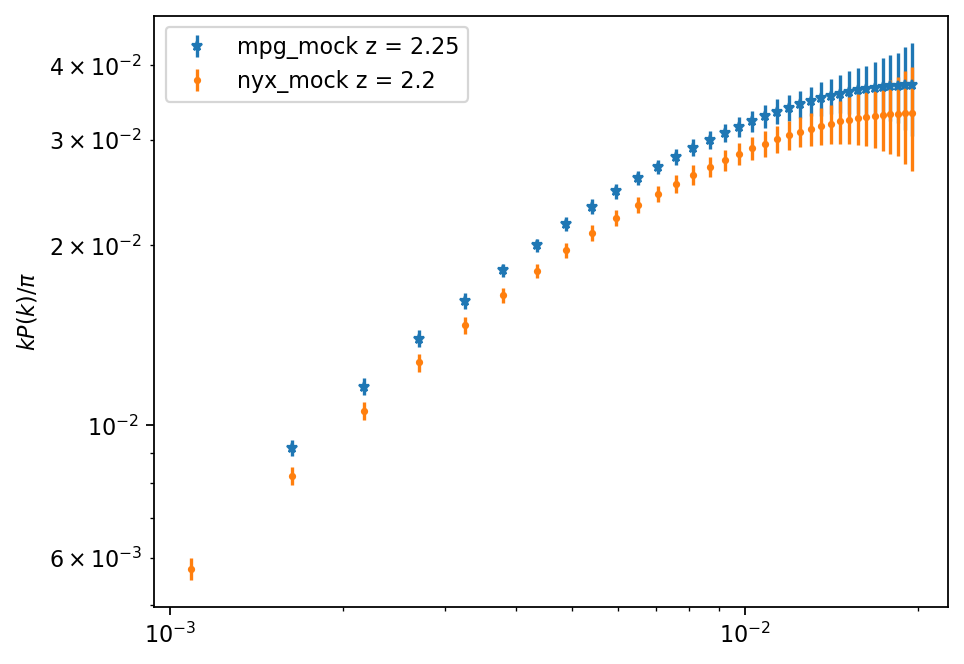

In [8]:
combined_plot(datasets,zmin=2.15,zmax=2.3,kmax=0.05)

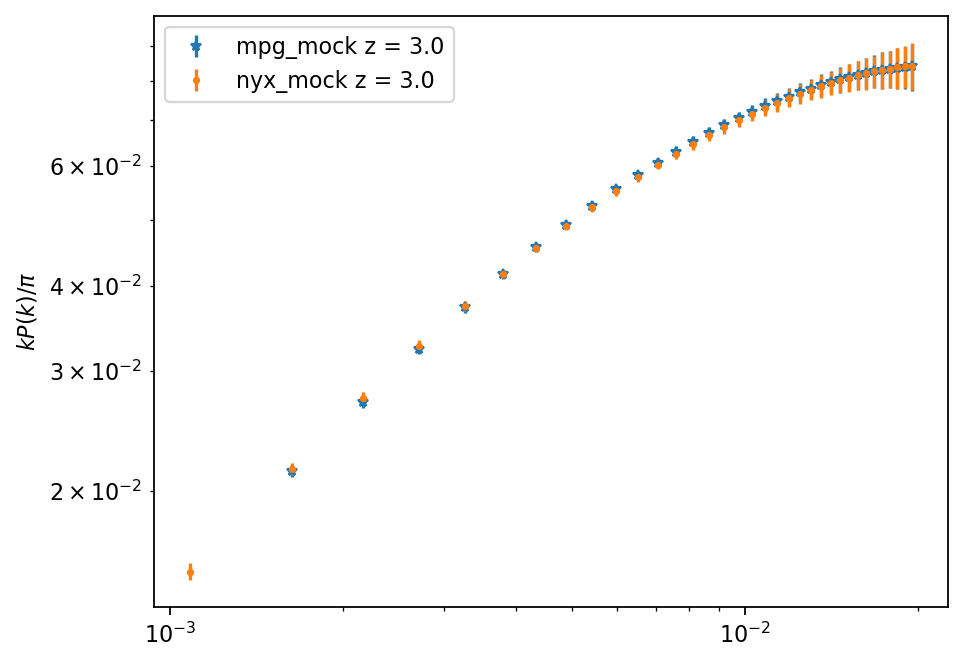

In [9]:
combined_plot(datasets,zmin=2.9,zmax=3.1,kmax=0.05)

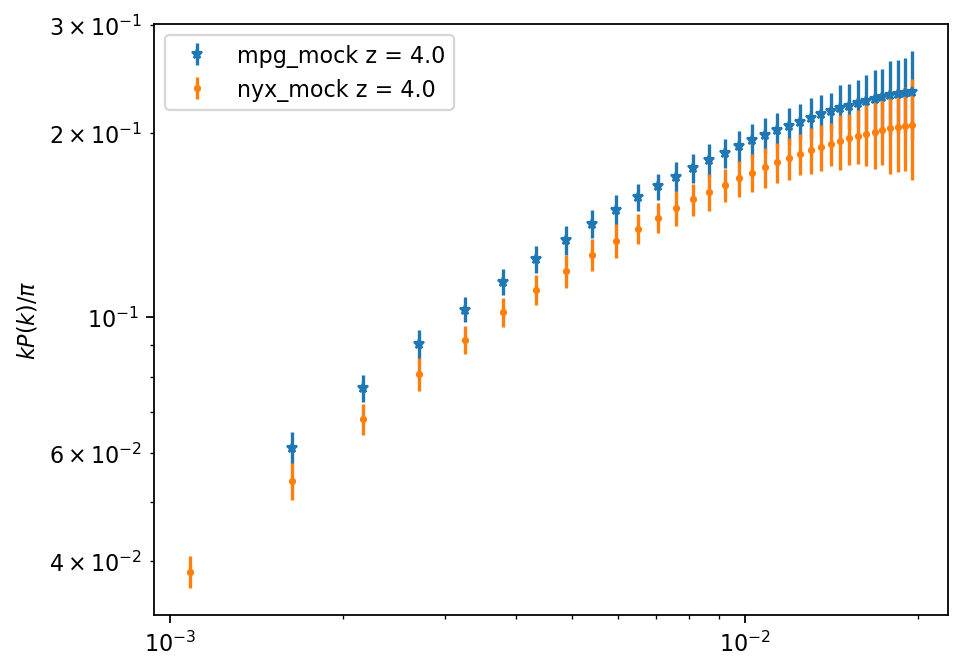

In [10]:
combined_plot(datasets,zmin=3.9,zmax=4.1,kmax=0.05)

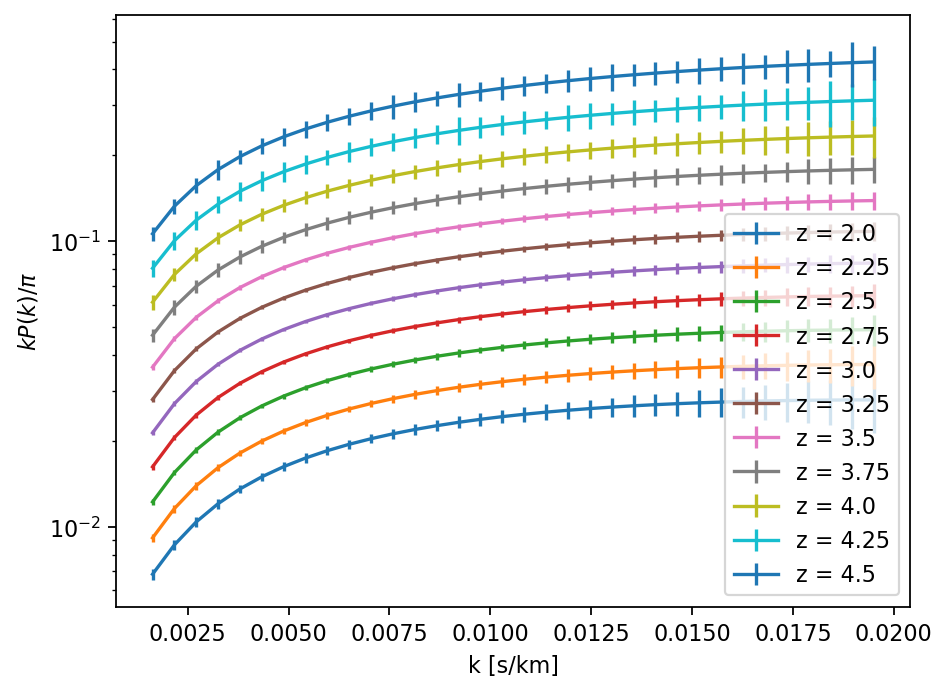

In [11]:
mpg_mock.plot_p1d()